# Tarea 5. Optimización
Guillermo Segura Gómez

## Ejercicio 1

**1. Encuentre y clasifique los puntos estacionarios para la función**

$$
f(\mathbf{x}) = x_1^2 - x_2^2 + x_3^2 - 2x_1x_3 - x_2x_3 + 4x_1 + 12. 
$$

Los puntos estacionarios de una función son aquellos puntos en los que la primera derivada o el gradiente, de la función es igual a cero. Son los puntos donde la pendiente de la función es cero. Para encontrar los puntos estacionarios, podemos definir la función gradiente y encontrar los valores para los cuales la función es igual a cero. El gradiente de una función $f$ de tres variables es igual a

$$
\nabla f = \left[ \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \frac{\partial f}{\partial x_3} \right]
$$

Derivando, el gradiente es igual a 

$$
\nabla f(\mathbf{x}) = \left[ 2x_1 - 2x_3 + 4, -2x_2 - x_3, -2x_1 - x_2 + 2x_3 \right] 
$$

Podemos expresar el gradiente como una matriz de tres ecuaciones con tres incógnitas

$$
\begin{bmatrix}
2 & 0 & -2 \\
0 & -2 & -1 \\
-2 & -1 & 2
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
x_3
\end{bmatrix} = 
\begin{bmatrix}
4 \\
0 \\
0
\end{bmatrix}
$$

Solucionar este sistema $Ax = b$ es similar a encontrar los puntos estacionarios de la función. Podemos utilizar cualquier método de solución de matrices, pero es un sistema muy simple, la solución se puede encontrar a mano. 

De la primera ecuación encontramos $x_1 = x_3 - 2$.
De la segunda ecuación encontramos $x_2 = -\frac{1}{2}x_3$

Sustituyendo en la ecuación 3 encontramos que $x_3 = -8$. Por lo tanto, $x_1 = -10$ y $x_2 = 4$. La función tiene un único punto estacionario.

$$
x = (-10, 4, -8)
$$

Para clasificar el punto estacionario $(-10, 4, -8)$ de la función $f(\mathbf{x})$, necesitamos evaluar el Hessiano de $f$ en este punto. Para una función de tres variables $f(x_1, x_2, x_3)$, la hessiana se define:

$$
H = \begin{bmatrix} \frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} & \frac{\partial^2 f}{\partial x_1 \partial x_3} \\ \frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2} & \frac{\partial^2 f}{\partial x_2 \partial x_3} \\ \frac{\partial^2 f}{\partial x_3 \partial x_1} & \frac{\partial^2 f}{\partial x_3 \partial x_2} & \frac{\partial^2 f}{\partial x_3^2} \end{bmatrix}
$$

Calculando la hessiana de $f$ en el punto estacionario $(-10, 4, -8)$ es:

$$
H = \begin{bmatrix} 2 & 0 & -2 \\ 0 & -2 & -1 \\ -2 & -1 & 2 \end{bmatrix}
$$

Para clasificar el punto estacionario, necesitamos examinar los valores propios de la matriz hessiana. La naturaleza del punto estacionario está determinada por el signo de los valores propios:

- Si todos los valores propios son positivos, el punto estacionario es un mínimo local.
- Si todos los valores propios son negativos, el punto estacionario es un máximo local.
- Si los valores propios son de signos mixtos, el punto estacionario es un punto de silla.

Calculando los valores propios de la matriz.

In [2]:
import numpy as np

# Matrix hessiana
H = np.array([[2,0,-2],[0,-2,-1],[-2,-1,2]])

print("Los eigenvalores de la matriz Hessiana son:")
eigenvalues, eigecvectors = np.linalg.eig(H)
print(eigenvalues)

Los eigenvalores de la matriz Hessiana son:
[ 4.08387236  0.21319818 -2.29707054]


Por lo que encontramos, los valores propios son mixtos, por lo que el punto estacionario $(-10, 4, -8)$ es un **punto silla**.

**2. Sea $\mathbf{x}_0 = (1,0,0)^\top$. Calcule el punto $\mathbf{x}_1$ usando la dirección de descenso máximo con paso exacto.**

Para calcular el punto $\mathbf{x}_1$ usando la dirección de descenso máximo con paso exacto desde el punto inicial $\mathbf{x}_0 = (1,0,0)^\top$, necesitamos determinar la dirección de descenso máximo, luego calcular el tama;o de paso exacto y finalmente calcular $x_1$. 

La dirección de descenso máximo en un punto dado es opuesta al gradiente de la función en ese punto. para {x}_0 = (1,0,0), evaluando en la funcion gradiente calculada en el ejercicio pasado.

$$
\nabla f(1,0,0) = \left[ 2x_1 - 2x_3 + 4, -2x_2 - x_3, -2x_1 - x_2 + 2x_3 \right] 
$$

El gradiente de f evaluado en ese punto $\nabla f(1,0,0) = (6, 0, -2)$, por lo que la direccion de descenso maximo es: $-\nabla f(x) = (-6, 0, 2)$.

Ahora, para calcular el tamaño de paso exacto, necesitamos encontrar el valor de $\alpha$ que minimiza la función $f$ a lo largo de la dirección de descenso máximo. Para esto, debido a que la funcion es cuadratica, calculamos $\alpha$ exacto utilizando la formula:

$$
\alpha = \frac{g_k^T g_k}{g_k^T A g_k}
$$

donde en este caso, $A$ es la matriz hessiana que ya calculamos en el ejercicio pasado. Entonces, calculando $\alpha$ de manera exacta como un producto de matrices, tenemos

$$
\alpha = \begin{bmatrix} 
6 \\
0 \\
-2
\end{bmatrix} \begin{bmatrix}
6 & 0 & -2
\end{bmatrix} / \begin{bmatrix} 
6 \\
0 \\
-2
\end{bmatrix} 
\begin{bmatrix} 2 & 0 & -2 \\ 0 & -2 & -1 \\ -2 & -1 & 2 \end{bmatrix}
\begin{bmatrix}
6 & 0 & -2
\end{bmatrix}
$$

Calculando el producto matricial tenemos

$$
\alpha = \frac{40}{128} \quad \rightarrow \quad \alpha = \frac{5}{16}
$$

Una vez que tenemos la dirección de descenso y el tamaño de paso exacto, actualizamos el punto inicial para obtener el nuevo punto $\mathbf{x}_1$ mediante la fórmula $\mathbf{x}_1 = \mathbf{x}_0 - \alpha \nabla f(\mathbf{x}_0)$.

Entonces

$$ 
\mathbf{x}_1 = \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} - \frac{5}{16} \begin{bmatrix} 6 \\ 0 \\ -2 \end{bmatrix} 
$$

Finalmente 
$$
\mathbf{x}_1 = \left(-\frac{7}{8}, 0, \frac{5}{8} \right)^T
$$

## Ejercicio 2

Considere la función

$$
f(\mathbf{x}) = 2x_1^2 + x_2^2 - 2x_1x_2 + 2x_1^3 + x_1^4
$$

Sea $\mathbf{x}_0 = (0,1)^\top$

**1. Aplique un paso del método de Newton a partir del punto si la Hessiana en $\mathbf{x}_0$ es definida positiva. Si no, aplique el algoritmo de descenso máximo con un tamaño de paso apropiado.**

Para definir que algoritmo debemos de utilizar, primero hay que calcular el gradiente y la hessiana de la función $f$. 
Calculando el gradiente:

$$
\nabla f = \left[ 4x_1^3 + 6x_1^2 + 4x_1 - 2x_2, -2x_1 + 2x_2 \right] 
$$

Y la Hessiana de la función es:

$$ 
H = \begin{bmatrix} 12x_1^2 + 12x_1 + 4 & -2 \\ -2 & 2 \end{bmatrix} 
$$

Para determinar si la hessiana es definida positiva en el punto $\mathbf{x}_0 = (0,1)^\top$, evaluamos la matriz y calculamos los valores propios. Una matriz es definida positiva si y solo si todos los valores propios son positivos. 

Calculando la hessiana:
$$ 
H(0,1) = \begin{bmatrix}  4 & -2 \\ -2 & 2 \end{bmatrix} 
$$

Ahora, encontremos sus eigenvalores. Utilizamos la función `eigen` de la libería `numpy`para simplificar los cálculos, como en el ejercicio pasado. 

In [51]:
# Calculo de eigenvalores
H = np.array([[4, -2], [-2, 2]])

print("Los eigenvalores de la matriz Hessiana son:")
eigenvalues, eigecvectors = np.linalg.eig(H)
print(eigenvalues)

Los eigenvalores de la matriz Hessiana son:
[5.23606798 0.76393202]


Ya que los eigenvalores son positivos, la matriz es definida positiva, por lo que podemos aplicar el método de Newton. El método de Newton es el siguiente:

Algoritmo 1: Metodo de Newton (Puro)
Entrada: Dada $f : R^n \rightarrow R$ de clase $C^2$, su funcion gradiente $\nabla f(x)$, su funcion Hessiana $\nabla^2 f(x)$, un punto inicial x0, una tolerancia $\tau > 0$ y numero máximo de iteraciones N.
Resultado: El punto xk.

for k = 0, 1, 2, ..., N − 1 do:

-  Calcular el gradiente gk = ∇f(xk );
-  if $|gk| < \tau$ then
        Terminar devolviendo xk ;
    end
- Calcular la Hessiana $H_k = \nabla^2 f(xk)$;
- Resolver el sistema $H_k p^N_k = −g_k$ (sin importar si la matriz es definida positiva);
- Calcular $x_{k+1} = x_k + p^N_k$ ;
- end

El paso siguiente es resolver el sistema $H_k p^N_k = −g_k$. Primero calculamos $g_k$.

$$
-\nabla f(0, 1) = -\left[ 4x_1^3 + 6x_1^2 + 4x_1 - 2x_2, -2x_1 + 2x_2 \right] = [-2, 2]
$$

Ahora resolvemos el sistema para encontrar $p_k$. El algoritmo de Newton, toma como $p_k$ la solución al sistema $H_k p^N_k = −g_k$ determinado por la hessiana, mientras que los métodos de descenso con cálculo de $\alpha$ toman $p_k$ como la dirección de descenso, es decir, $p_k = -\nabla f(x)$.

$$ 
\begin{bmatrix}  4 & -2 \\ -2 & 2 \end{bmatrix} 
\begin{bmatrix} p_1 \\ p_2 \end{bmatrix} = \begin{bmatrix} -2 \\ 2 \end{bmatrix}
$$

Es un sistema muy simple, resolviendo por sustitución $p_1 = (2p_2 - 2)/4$. Entonces si remplazamos el valor de $p_1$ en la segunda ecuación
$$
(2 - 2p_2)/2 + 2p_2 = 2 \quad \therefore \quad p_2 = -1 \qquad p_1 = 0
$$

Ahora calculamos 

$$
x_{k+1} = x_0 + p_k = [0, 1]^T + [0, -1]^T = [0, 0]^T
$$

Si programamos la función que haga esto. Utilizamos backtracking para calcular la $\alpha$.

In [52]:
# Función para calcular el tamaño de alpha
def Backtracking_DescSuf(alpha_0, rho, c1, xk, fk, gk, pk, nMax):

    for i in range(nMax):

        comp1 = fk(xk + alpha_0*pk)
        comp2 = fk(xk) + c1*alpha_0* np.dot(gk, pk)

        if (comp1 <= comp2):
            return alpha_0, i

        alpha_0 = alpha_0*rho

    return alpha_0, i

# Función para revisar si una matriz es definida positiva
def is_positive_definite_cholesky(M):
    try:
        L = np.linalg.cholesky(M)
        return True, L
    except np.linalg.LinAlgError:
        return False, None

In [77]:
def NewtonODesc(f, gradf, hesf, x0, tau, nMax, alpha_0, rho, c1, nBack):

    xk = np.array(x0)
    sequence = []

    for k in range(nMax):
        
        # Calcular el gradiente
        gk = gradf(xk)

        
        if (np.linalg.norm(gk) < tau):
            return xk, k, True, gk, sequence
        
        # Calcular la Hessiana en el punto xk
        H = hesf(xk)

        # Intenta calcular la factorización Cholesky para verificar si la matriz es definida positiva
        condition, L = is_positive_definite_cholesky(H)
        if not condition:
            # Si la matriz no es definida positiva, ejecutamos el método del descenso máximo
            
            # Calcular el tamaño de paso utilizando backtracking
            alpha_k, _ = Backtracking_DescSuf(alpha_0, rho, c1, xk, f, gk, -gk, nBack)

            # Actualizar xk para la siguiente iteración
            xk = xk + alpha_k * (-gk)


        else:
            # Si la matriz es definida positiva seguimos con el método de Newton

            # Resuelve el sistema lineal para encontrar la dirección pk
            y = np.linalg.solve(L, -gk)
            pk = np.linalg.solve(L.T, y)

            # Actualizar xk
            xk = xk + pk

            # Guardar la secuencia de puntos si la dimensión de x es 2
            if len(xk) == 2:
                sequence.append(xk.tolist())

    return xk, nMax, False, gk, sequence

**2. Calcule el cambio de la función objetivo:$f(\mathbf{x}_1) - f(\mathbf{x}_0)$.**

Para evaluar el cambio sustituimos el punto calculado en la función.

In [78]:
def f(x):
    x1 = x[0]
    x2 = x[1]
    return 2*x1*+2 + x2**2 - 2*x1*x2 + 2*x1**3 + x1**4

In [83]:
x_0 = np.array([0, 1])
x_1 = np.array([0,-1])

print(f"El cambio en la función objetivo es f(x1) - f(x0) = {f(x_1)}  - {f(x_0)} = ", f(x_1) - f(x_0))

El cambio en la función objetivo es f(x1) - f(x0) = 1  - 1 =  0


Probamos la función. Definimos su gradiente y su hessiana:

In [64]:
def grad_f(x):
    x1 = x[0]
    x2 = x[1]
    return np.array([4*x1**3 + 6*x1**2 + 4*x1 - 2*x2, -2*x1 + 2*x2])

def hessian_f(x):
    x1 = x[0]
    x2 = x[1]
    return np.array([[12*x1**2 + 12*x1 + 4, -2],[-2, 2]])

In [11]:
import matplotlib.pyplot as plt

# Función para visualizar los contornos de nivel de función en 2D
def contornosFnc2D(fncf, xleft, xright, ybottom, ytop, levels, secuencia=None):
    ax = np.linspace(xleft, xright, 250)
    ay = np.linspace(ybottom, ytop, 200)
    mX, mY = np.meshgrid(ax, ay)
    mZ = np.array([[fncf(np.array([x, y])) for x in ax] for y in ay])

    fig, ax = plt.subplots()
    CS = ax.contour(mX, mY, mZ, levels, cmap='viridis')
    plt.colorbar(CS, ax=ax)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')

    # Graficar la secuencia de puntos
    if secuencia is not None:
        secuencia = np.array(secuencia)
        ax.plot(secuencia[:, 0], secuencia[:, 1], 'r.-')  # 'r.-' para puntos rojos conectados por líneas
        ax.plot(secuencia[0, 0], secuencia[0, 1], 'go')  # Punto de inicio en verde
        ax.plot(secuencia[-1, 0], secuencia[-1, 1], 'bo')  # Punto final en azul

    plt.show()

Función f:
[[ 4. -2.]
 [-2.  2.]]
[ 0. -1.]
Resultado para x0 = [0. 1.]:
xk = [0. 0.], k = 1, f(xk) = 0.0, |Grad f(xk)| = 0.0
Convergió: True
Secuencia de puntos: [[0.0, 0.0]]


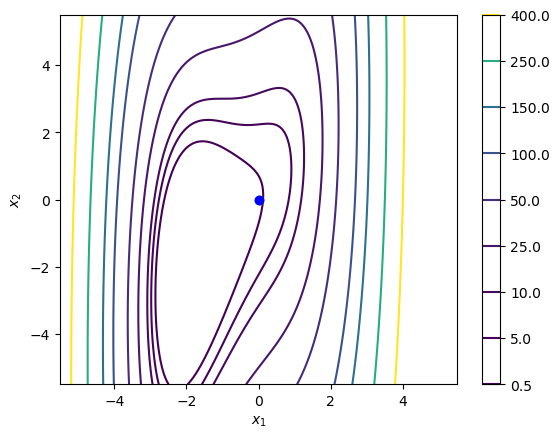

In [76]:
# Puntos iniciales para la función de Himmelblau
puntos_iniciales_f= [np.array([0.0, 1.0])]

# Epsilon de la máquina
epsilon_m = np.finfo(float).eps

n = 2  # Dimensión del problema

# Configuración de tolerancia
tau = np.sqrt(n * epsilon_m)

# Parámetros iniciales
alpha_0 = 1
rho = 0.5
c1 = 0.1

# Número máximo de iteraciones
NMax = 1000
NBack = 500

# Función para probar el algoritmo de newton con diferentes funciones
def probar_newton(func, grad_func, hess_func, puntos_iniciales):
    for x0 in puntos_iniciales:
        xk, k, convergio, gradiente, secuencia = NewtonODesc(func, grad_func, hess_func, x0, tau, NMax, alpha_0, rho, c1, NBack)
        valor_final = func(xk)
        print(f"Resultado para x0 = {x0}:")
        print(f"xk = {xk}, k = {k}, f(xk) = {valor_final}, |Grad f(xk)| = {np.linalg.norm(gradiente)}")
        print(f"Convergió: {convergio}")
        if len(x0) == 2 and secuencia:
            print(f"Secuencia de puntos: {secuencia[:10]}")
            contornosFnc2D(func, xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5, levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400], secuencia=secuencia)
        print()

# Probar con la función de Himmelblau
print("Función f:")
probar_newton(f, grad_f, hessian_f, puntos_iniciales_f)

## Ejercicio 3

Supongamos que $f_1, f_2: \mathbb{R}^n \rightarrow \mathbb{R}$ son funciones convexas.
   
**1. Muestre que también es convexa la función $f(\mathbf{x})$ definida como**
   
$$
f(\mathbf{x}) = \max\{f_1(\mathbf{x}), f_2(\mathbf{x}) \}.
$$

---

Por definicion una funcion g es convexa si esta definida sobre un conjunto convexo $C$ y para cualesquiera de los dos puntos $x$, $y$ miembros de $C$ y para cada $t$ en [0,1] se cumple que

$$
g(tx + (1-t)y) \leq tg(x) + (1-t)g(y)
$$

Si calculamos $f(tx + (1-t)y)$ tenemos 

$$
f(tx + (1-t)y) = \max\{f_1(tx + (1-t)y), f_2(tx + (1-t)y)\}
$$

Como las funciones $f_1$ y $f_2$ son convexas, para cada una de ellas se cumple la relacion:
$$
f_i(tx + (1-t)y) \leq tf_i(x) + (1-t)f_i(y)
$$

La funcion $\max$ escoge el valor maximo entre las funciones, por lo que siempre tendremos una cota superior. Suponiendo el caso de $f_1$ > $f_2$ entonces siempre se cumple (esto es simetrico, se puede escoger el caso contrario y tendremos la misma conclusion)

$$
f(tx + (1-t)y) = \max\{f_1(tx + (1-t)y), f_2(tx + (1-t)y)\} \leq tf_1(x) + (1-t)f_1(y)
$$

Es importante mencioanr que el máximo de dos cantidades que cumplen las desigualdades de convexidad también cumple con la desigualdad de convexidad general. Para cualquier $x, y \in \mathbb{R}^n$ y $t \in [0,1]$, se tiene:

$$ 
\max\{f_1(tx + (1-t)y), f_2(tx + (1-t)y)\} \leq \max\{tf_1(x) + (1-t)f_1(y), tf_2(x) + (1-t)f_2(y)\} 
$$

Por la naturaleza de la funcion $f$, se escogera siempre el valor maximo. Entonces la inecuacion siempre es cierta, ya que se escogen los valores maximos por lo que 

$$
f(tx + (1-t)y)  \leq tf(x) + (1-t)f(y)
$$

lo cual demuestra que la funcion $f$ siempre es convexa. 

**2. Si $n=1$ y $f_1(-0.4) = 0.36$, $f_1(0.6) = 2.56$, $f_2(-0.4) = 3.66$ y $f_2(1) = 2$, identifique el intervalo más pequeño en el que se puede garantizar que se encuentra el minimizador de la función $f(x)$.** 

Explique su respuesta.

---

Para identificar el intervalo más pequeño en el que se puede garantizar que se encuentra el minimizador de la función $f(x) = \max\{f_1(x), f_2(x)\}$ dados los valores de $f_1$ y $f_2$ necesitamos analizar los valores de la funcion en los puntos

Primero, es importante notar lo siguiente. Dado que $f(x)$ toma el valor máximo entre $f_1(x)$ y $f_2(x)$ para cualquier $x$, necesitamos saber en qué puntos $f_1$ y $f_2$ se cruzan o cuál de las dos es mayor en los puntos dados, si $f_1$ y $f_2$ se cruzan en algún punto entre los puntos dados el punto en el que se cruzan es un punto estacionario si existe un cambio de pendiente.

Podemos entonces definir el intervalo más pequeño posible que debe contener al minimizador de $f(x)$.

Dada la información:
- $f_1(-0.4) = 0.36$ y $f_1(0.6) = 2.56$
- $f_2(-0.4) = 3.66$ y $f_2(1) = 2$

Podemos notar lo siguiente:
- En $x = -0.4$, $f_2(x) > f_1(x)$, por lo tanto, $f(-0.4) = f_2(-0.4) = 3.66$.
- Aunque no tenemos el valor de $f_2$ en $x = 0.6$, sabemos que $f_2(1) = 2$, lo que implica que $f_2$ decrece al menos en el intervalo $[0.6, 1]$.

Vemos que $f_2$ es mayor que $f_1$ en $x = -0.4$ y $f_2$ decrece a $2$ en $x = 1$, mientras que $f_1$ aumenta a $2.56$ en $x = 0.6$, entonces podemos inferir que debe haber un punto de cruce $x_c$ en el intervalo $[0.6, 1]$ donde $f_1(x_c) = f_2(x_c)$. Antes de este punto de cruce, $f_2$ es la función dominante y después de este punto, $f_1$ se convierte en la función dominante.

Por lo tanto, el minimizador de $f(x)$ debe encontrarse en el intervalo $[-0.4, x_c]$, donde $f(x) = f_2(x)$, dado que $f_2$ está disminuyendo en este intervalo y $f_1$ está aumentando en el intervalo hasta $x = 0.6$. El minimizador de $f(x)$ no puede estar más allá de $x_c$ en el intervalo $[x_c, 1]$ porque en este intervalo $f(x)$ seguirá los valores de $f_1(x)$, que están aumentando.

## Ejercicio 4

Programe el método de región de confianza (MRC) que usa como 
aproximación del subproblema de optimización al punto de Cauchy,
descrito en la Clase 13 en el Algoritmo 3.


**1. Si la dimensión $n$ de la variable $\mathbf{x}$ es 2, en la función que implementa el algoritmo se crea un arreglo $\mathbf{M}$ en el que se guarda los puntos $\mathbf{x}_0, \mathbf{x}_1,..., \mathbf{x}_k$ generados. Si $n>2$, definir $\mathbf{M}$ como $None$.**

La función debe devolver el último valor $k$, $\mathbf{x}_k$, $\mathbf{g}_k$ y $\mathbf{M}$.

In [56]:
# Funcion auxiliar para calcular mk. La aproximacion local cuadratica basada en el teorema de taylor aldedor de un punto xk
def mk(p, f, gradf, hesf, xk):
    return f(xk) + np.dot(p.T, gradf(xk)) + 0.5*( np.dot(p.T, hesf(xk) @ p.T) )

def ConfidenceRegion_Cauchy(f, gradf, hesf, x0, tau, Nmax, deltaMax, deltaMin, eta):

    xk = np.array(x0)
    sequence = []

    # Epsilon de la máquina
    epsilon_m = np.finfo(float).eps

    # Delta cero
    delta0 = 0.25*(deltaMin + deltaMax)

    for k in range(Nmax):

        # Calcular el gradiente
        gk = gradf(xk)

        # Condicion de paro
        if (np.linalg.norm(gk) < tau):
            return xk, k, True, gk, sequence
        
        # Calculo del punto de Cauchy
        Bk = hesf(xk)

        aux = (gk.T @ Bk) @ gk

        if (aux <= epsilon_m):
            tk = 1.0
        else:
            val = np.linalg.norm(gk)**3 / (delta0*aux)
            tk = np.min([1.0, val])

        pk = -tk*(delta0 / np.linalg.norm(gk))*gk

        # Calculo de la razon de decaimiento

        zero = np.zeros(len(x0)) # Vector de ceros

        rho_k = (f(xk) - f(xk + pk))/(mk(zero, f, gradf, hesf, xk) - mk(pk, f, gradf, hesf, xk))

        # Decision sobre modificar el tamanio de paso
        if (rho_k < 0.25 and delta0 > 4*deltaMin):
            delta0 = 0.25*delta0
        elif (rho_k < 0.75 and np.linalg.norm(pk) == delta0):
            delta0 = np.min([deltaMax, 2*delta0])
        else:
            delta0 = delta0
        
        # Decision sobre aceptar el paso calculado o rechazarlo
        if rho_k > eta:
            xk = xk + pk
        else:
            xk = xk

        # Guardar la secuencia de puntos si la dimensión de x es 2
        if len(xk) == 2:
            sequence.append(xk.tolist())

    return xk, NMax, False, gk, sequence

**2. Pruebe el algoritmo en la siguientes funciones**

Fijando la cantidad de iteraciones máximas $N=50000$, $\Delta_{\min}=10^{-5}$,$\eta=0.25$ y la tolerancia $\tau = \sqrt{n\epsilon_m}$, donde $\epsilon_m$ es el épsilon de máquina, excepto para la función Hartmann para la cual es mejor usar una tolerancia más grande, como $\tau = \sqrt{n}\epsilon_m^{1/3}$. Use los puntos iniciales siguientes y pruebe dos valores para el radio de la región de confianza $\Delta_{\max}=4$ y $\Delta_{\max}=0.25$.
   

**Función de Himmelblau** 
-$\mathbf{x}_0 = (2,4)$


**Función de Beale**
-$\mathbf{x}_0 = (2,3)$ 


**Función de Rosenbrock**
-$\mathbf{x}_0 = (-1.2, 1.0)\in \mathbb{R}^{2}$ 
-$\mathbf{x}_0 = (-1.2, 1.0, ..., -1.2, 1.0) \in \mathbb{R}^{10}$ 
-$\mathbf{x}_0 = (-1.2, 1.0, ..., -1.2, 1.0) \in \mathbb{R}^{20}$


**Función de Hartmann de dimensión 6**
-$\mathbf{x}_0 = (0,0,0,0,0,0)$


En cada caso imprima los resultados:
- El número de iteraciones realizadas $k$
- El punto $\mathbf{x}_k$ obtenido
- $f(\mathbf{x}_k)$
- $\|\nabla f(\mathbf{x}_k)\|$
- La variable que indica si el algoritmo terminó porque se cumplió el criterio de paro o no.
- Si $n=2$, genere la gráfica de los contornos de nivel de la función y la trayectoria
  de los puntos $\mathbf{x}_0, \mathbf{x}_1, ..., \mathbf{x}_k$.

In [40]:
def himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

def grad_himmelblau(x):
    df_dx1 = 4 * x[0] * (x[0]**2 + x[1] - 11) + 2 * (x[0] + x[1]**2 - 7)
    df_dx2 = 2 * (x[0]**2 + x[1] - 11) + 4 * x[1] * (x[0] + x[1]**2 - 7)
    return np.array([df_dx1, df_dx2])

def hessian_himmelblau(x):
    H11 = 12*x[0]**2 + 4*x[1] - 42
    H12 = 4*x[0] + 4*x[1]
    H21 = H12  # La matriz es simétrica, por lo que H21 = H12
    H22 = 12*x[1]**2 + 4*x[0] - 26
    H = np.array([[H11, H12], [H21, H22]])
    return H

In [41]:
def beale(x):
    return ((1.5 - x[0] + x[0]*x[1])**2 + 
            (2.25 - x[0] + x[0]*x[1]**2)**2 + 
            (2.625 - x[0] + x[0]*x[1]**3)**2)

def grad_beale(x):
    x1, x2 = x
    df_dx1 = 2*(1.5 - x1 + x1*x2)*(-1 + x2) + 2*(2.25 - x1 + x1*x2**2)*(-1 + x2**2) + 2*(2.625 - x1 + x1*x2**3)*(-1 + x2**3)
    df_dx2 = 2*(1.5 - x1 + x1*x2)*x1 + 2*(2.25 - x1 + x1*x2**2)*2*x1*x2 + 2*(2.625 - x1 + x1*x2**3)*3*x1*x2**2
    return np.array([df_dx1, df_dx2])


def hessian_beale(x):
    x1, x2 = x[0], x[1]
    
    H11 = 2 * ((-1 + x2) ** 2) + 2 * ((-1 + x2 ** 2) ** 2) + 2 * ((-1 + x2 ** 3) ** 2)
    H12 = (2 * x1 * (-1 + x2) + 2 * (1.5 - x1 + x1 * x2) + 
            4 * x1 * x2 * (-1 + x2 ** 2) + 4 * x2 * (2.25 - x1 + x1 * x2 ** 2) + 
            6 * x1 * x2 ** 2 * (-1 + x2 ** 3) + 6 * x2 ** 2 * (2.625 - x1 + x1 * x2 ** 3))
    H21 = H12  
    H22 = (2 * x1 ** 2 + 8 * x1 ** 2 * x2 ** 2 + 18 * x1 ** 2 * x2 ** 4 + 
           4 * x1 * (2.25 - x1 + x1 * x2 ** 2) + 12 * x1 * x2 * (2.625 - x1 + x1 * x2 ** 3))

    H = np.array([[H11, H12], [H21, H22]])
    return H

In [42]:
def rosenbrock(x):
    return sum(100*(x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2)

def grad_rosenbrock(x):
    df_dx = np.zeros_like(x)
    n = len(x)
    df_dx[:-1] += -400 * x[:-1] * (x[1:] - x[:-1]**2) + 2 * (x[:-1] - 1)  # Derivadas parciales para x_i donde i < n
    df_dx[1:] += 200 * (x[1:] - x[:-1]**2)  # Derivadas parciales para x_{i+1} donde i < n
    return df_dx

def hessian_rosenbrock(x):
    n = len(x)
    H = np.zeros((n, n))

    for i in range(n-1):
        # Diagonal principal
        H[i, i] = 1200 * x[i]**2 - 400 * x[i+1] + 2
        # Elementos fuera de la diagonal
        H[i, i+1] = -400 * x[i]
        H[i+1, i] = -400 * x[i]

    # Para el último elemento de la diagonal
    H[n-1, n-1] = 200

    return H

In [43]:
# Parámetros
alpha = np.array([1.0, 1.2, 3.0, 3.2])
A = np.array([
    [10, 3, 17, 3.5, 1.7, 8],
    [0.05, 10, 17, 0.1, 8, 14],
    [3, 3.5, 1.7, 10, 17, 8],
    [17, 8, 0.05, 10, 0.1, 14]
])
P = 10**-4 * np.array([
    [1312, 1696, 5569, 124, 8283, 5886],
    [2329, 4135, 8307, 3736, 1004, 9991],
    [2348, 1451, 3522, 2883, 3047, 6650],
    [4047, 8828, 8732, 5743, 1091, 381]
])

def hartmann_6D(x):
    sum_alpha_exp = np.sum([alpha[i] * np.exp(-np.sum(A[i, :] * (x - P[i, :])**2)) for i in range(4)])
    return -(1 / 1.94) * (2.58 + sum_alpha_exp)

def grad_hartmann_6D(x):
    grad = np.zeros(6)  # Inicializar un array de gradientes para cada x_j
    for j in range(6):  # Iterar sobre cada variable x_j
        first_derivative_sum = 0
        for i in range(4):  # Sumar sobre todas las alfas
            exp_term = np.exp(-np.sum(A[i, :] * (x - P[i, :])**2))
            # Acumular la suma de las derivadas primeras para la variable x_j
            first_derivative_sum += alpha[i] * exp_term * (-2 * A[i, j] * (x[j] - P[i, j]))
        grad[j] = -(1 / 1.94) * first_derivative_sum  # Asignar el gradiente acumulado a la variable x_j
    return grad

def hessian_hartmann_6D(x):
    
    H = np.zeros((6, 6))

    for j in range(6):  # Iterar sobre cada variable x_j
        for k in range(6):  # Iterar sobre otra variable x_k
            second_derivative_sum = 0
            for i in range(4):  # Sumar sobre todas las alfas
                exp_term = np.exp(-np.sum(A[i, :] * (x - P[i, :])**2))
                if j == k:  # Diagonal: k == j
                    second_derivative_sum += alpha[i] * exp_term * (4 * A[i, j]**2 * (x[j] - P[i, j])**2 - 2 * A[i, j])
                else:  # Fuera de la diagonal: k != j
                    second_derivative_sum += alpha[i] * exp_term * (-2 * A[i, j] * (x[j] - P[i, j])) * (-2 * A[i, k] * (x[k] - P[i, k]))
            H[j][k] = -(1 / 1.94) * second_derivative_sum

    return H

In [44]:
import matplotlib.pyplot as plt

# Función para visualizar los contornos de nivel de función en 2D
def contornosFnc2D(fncf, xleft, xright, ybottom, ytop, levels, secuencia=None):
    ax = np.linspace(xleft, xright, 250)
    ay = np.linspace(ybottom, ytop, 200)
    mX, mY = np.meshgrid(ax, ay)
    mZ = np.array([[fncf(np.array([x, y])) for x in ax] for y in ay])

    fig, ax = plt.subplots()
    CS = ax.contour(mX, mY, mZ, levels, cmap='viridis')
    plt.colorbar(CS, ax=ax)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')

    # Graficar la secuencia de puntos
    if secuencia is not None:
        secuencia = np.array(secuencia)
        ax.plot(secuencia[:, 0], secuencia[:, 1], 'r.-')  # 'r.-' para puntos rojos conectados por líneas
        ax.plot(secuencia[0, 0], secuencia[0, 1], 'go')  # Punto de inicio en verde
        ax.plot(secuencia[-1, 0], secuencia[-1, 1], 'bo')  # Punto final en azul

    plt.show()

#### Probamos la funcion para $\Delta_{max} = 4$

Función de Himmelblau:
Resultado para x0 = [2. 4.]:
xk = [3. 2.], k = 26, f(xk) = 5.239958757106325e-18, |Grad f(xk)| = 1.7654431294742216e-08
Convergió: True
Secuencia de puntos: [[2.0115330717936115, 3.0196888975430376], [2.4210374096245992, 2.2841725962620023], [3.1279678660838774, 2.2808263590257933], [2.9508410501336795, 2.1227609091221717], [2.9858276405286603, 2.0091217079978163], [2.9978229980700064, 2.0087228806521122], [2.997451808452442, 2.0017717297320807], [2.999598192143379, 2.0016405507957074], [2.999514372448241, 2.0003420223310497], [2.999923105083967, 2.0003150597534787]]


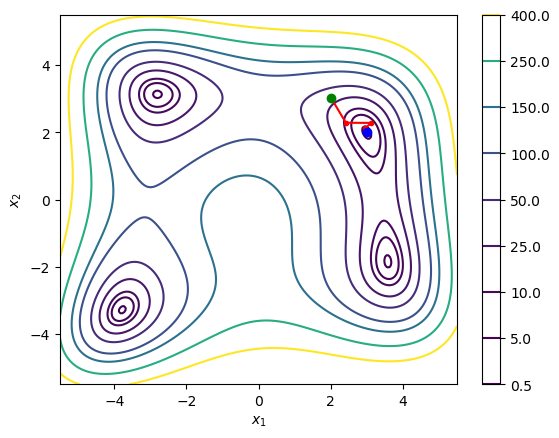


Función de Beale:
Resultado para x0 = [2. 3.]:
xk = [2.99999994 0.49999998], k = 457, f(xk) = 5.871157468186914e-16, |Grad f(xk)| = 1.9644886019920218e-08
Convergió: True
Secuencia de puntos: [[1.7647969331121713, 2.5258285294426543], [1.570482659019362, 2.1080337358838412], [1.4131747474842258, 1.7330680080061769], [1.2917304405933945, 1.3855053492963882], [1.2116152523906283, 1.044919983365019], [1.1984515209434279, 0.6782800192288676], [1.360248213804938, 0.2236519656815597], [1.9434928420012476, -0.11144138165406098], [2.0243618841493323, 0.2969525832548717], [2.1512514643372507, 0.17816837924529866]]


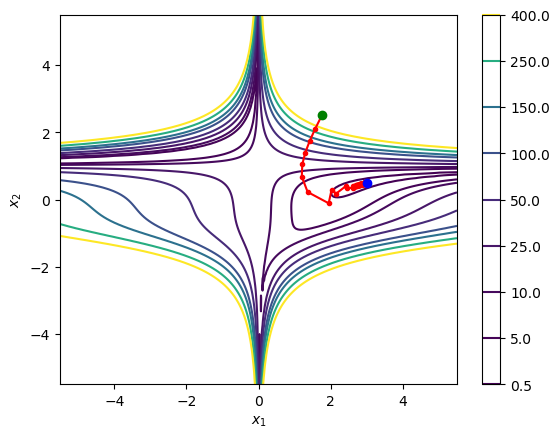


Función de Rosenbrock:
Resultado para x0 = [-1.2  1. ]:
xk = [0.99999998 0.99999995], k = 1368, f(xk) = 5.1605145364569e-16, |Grad f(xk)| = 2.042313248709397e-08
Convergió: True
Secuencia de puntos: [[-1.0566974440750523, 1.0584908391530399], [-1.0308940228699568, 1.0689491107013913], [-1.0226013163648089, 1.0620976240052034], [-1.025723581068271, 1.0582463886156712], [-1.0176719733516828, 1.0518005024601906], [-1.0207146012648232, 1.0479273410850543], [-1.0128757290946004, 1.0418418006380195], [-1.0158455297409503, 1.0379431155834038], [-1.0081957032034894, 1.032180558084606], [-1.0110983911107312, 1.028253093706602]]


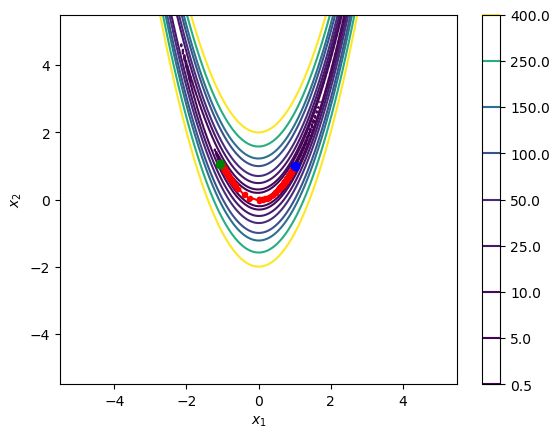


Resultado para x0 = [-1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1. ]:
xk = [1.         1.         1.         1.         1.         1.
 1.         0.99999999 0.99999999 0.99999998], k = 30802, f(xk) = 2.0657941919883262e-16, |Grad f(xk)| = 2.10552955312891e-08
Convergió: True

Resultado para x0 = [-1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.
 -1.2  1.  -1.2  1.  -1.2  1. ]:
xk = [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.99999999
 0.99999999 0.99999998], k = 34600, f(xk) = 1.9513699954576945e-16, |Grad f(xk)| = 2.1060290723599506e-08
Convergió: True

Función de Hartmann dimensión 6:
Resultado para x0 = [0. 0. 0. 0. 0. 0.]:
xk = [0.20168965 0.15001061 0.47687351 0.27533247 0.3116517  0.65730054], k = 45, f(xk) = -3.0424577378416795, |Grad f(xk)| = 6.844380427477618e-06
Convergió: True



In [57]:
# Puntos iniciales para la función de Himmelblau
puntos_iniciales_himmelblau = [np.array([2.0, 4.0])]

# Puntos iniciales para la función de Beale
puntos_iniciales_beale = [np.array([2.0, 3.0])]

# Puntos iniciales para la función de Rosenbrock
puntos_iniciales_rosenbrock = [
    np.array([-1.2, 1.0]),
    np.array([-1.2 if i % 2 == 0 else 1.0 for i in range(10)]), # Usamos una list comprenhension
    np.array([-1.2 if i % 2 == 0 else 1.0 for i in range(20)])
]

# Puntos iniciales para la función de Hartmann
puntos_iniciales_hartmann = [np.zeros(6)]

# Epsilon de la máquina
epsilon_m = np.finfo(float).eps

n = 2  # Dimensión del problema

# Configuración de tolerancia
tau = np.sqrt(n * epsilon_m)
tau_hartman = np.sqrt(n)* epsilon_m**(1/3)

# Número máximo de iteraciones
NMax = 50000

# Parametros de la funcion
deltaMin = 1*10**(-5)
eta = 0.25
deltaMax = 4

# Función para probar el algoritmo de newton con diferentes funciones
def probar_newton(func, grad_func, hess_func, puntos_iniciales, name):
    for x0 in puntos_iniciales:
        if not name:
            xk, k, convergio, gradiente, secuencia = ConfidenceRegion_Cauchy(func, grad_func, hess_func, x0, tau, NMax, deltaMax, deltaMin, eta)
        else:
            xk, k, convergio, gradiente, secuencia = ConfidenceRegion_Cauchy(func, grad_func, hess_func, x0, tau_hartman, NMax, deltaMax, deltaMin, eta)
        valor_final = func(xk)
        print(f"Resultado para x0 = {x0}:")
        print(f"xk = {xk}, k = {k}, f(xk) = {valor_final}, |Grad f(xk)| = {np.linalg.norm(gradiente)}")
        print(f"Convergió: {convergio}")
        if len(x0) == 2 and secuencia:
            print(f"Secuencia de puntos: {secuencia[:10]}")
            contornosFnc2D(func, xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5, levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400], secuencia=secuencia)
        print()

# Probar con la función de Himmelblau
print("Función de Himmelblau:")
probar_newton(himmelblau, grad_himmelblau, hessian_himmelblau, puntos_iniciales_himmelblau, False)

# Probar con la función de Beale
print("Función de Beale:")
probar_newton(beale, grad_beale, hessian_beale, puntos_iniciales_beale, False)

# Probar con la función de Rosenbrock
print("Función de Rosenbrock:")
probar_newton(rosenbrock, grad_rosenbrock, hessian_rosenbrock, puntos_iniciales_rosenbrock, False)

# Probar con la función de Hartmann
print("Función de Hartmann dimensión 6:")
probar_newton(hartmann_6D, grad_hartmann_6D, hessian_hartmann_6D, puntos_iniciales_hartmann, True)

#### Probamos la funcion para $\Delta_{max} = 0.25$

Función de Himmelblau:
Resultado para x0 = [2. 4.]:
xk = [3. 2.], k = 57, f(xk) = 3.2932453478209095e-18, |Grad f(xk)| = 1.4347558553684274e-08
Convergió: True
Secuencia de puntos: [[2.000735272647252, 3.937501824983571], [2.0020985855788194, 3.875014195134931], [2.0041620325418354, 3.8125457655654214], [2.0070069377807433, 3.7501080444312254], [2.010725070699109, 3.687716234120485], [2.015419947875877, 3.625390311467507], [2.0212081728801463, 3.56315640625861], [2.0282207220576627, 3.501048543147061], [2.0366040202186886, 3.439110809751389], [2.0465205569321516, 3.377399993796157]]


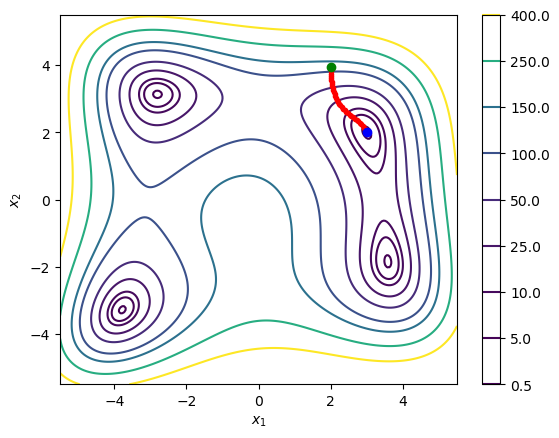


Función de Beale:
Resultado para x0 = [2. 3.]:
xk = [2.99999994 0.49999999], k = 962, f(xk) = 5.552970357295272e-16, |Grad f(xk)| = 2.088037591368447e-08
Convergió: True
Secuencia de puntos: [[1.9722260257479118, 2.9440074213802014], [1.944589832311369, 2.887946710373401], [1.9171000930583688, 2.8318140394762126], [1.8897662376886917, 2.7756052958780892], [1.8625985372439782, 2.719316055709152], [1.8356082008378884, 2.6629415557385436], [1.8088074860053767, 2.6064766623027427], [1.7822098249164404, 2.5499158372482222], [1.7558299691135593, 2.493253100691741], [1.729684155926392, 2.436481990441617]]


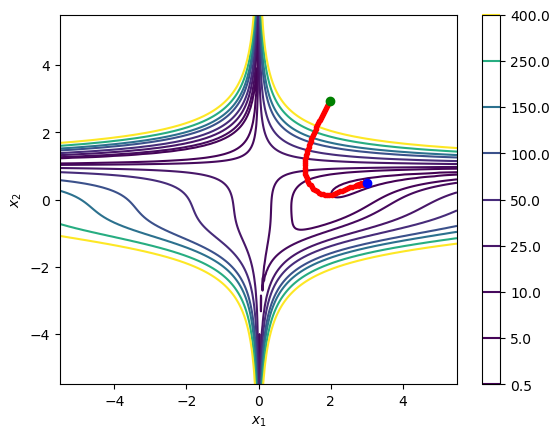


Función de Rosenbrock:
Resultado para x0 = [-1.2  1. ]:
xk = [0.99999998 0.99999995], k = 1359, f(xk) = 5.399835342439885e-16, |Grad f(xk)| = 2.092147358302599e-08
Convergió: True
Secuencia de puntos: [[-1.1421322076499407, 1.0236195070816567], [-1.084580924793007, 1.0480000802449605], [-1.034097510195819, 1.06965173671136], [-1.0294264597937488, 1.069582124361667], [-1.0294391869280122, 1.059771295944569], [-1.0246695512012356, 1.059765108631404], [-1.024534989617314, 1.0494018304287056], [-1.019654811418275, 1.0494652093197272], [-1.0193463481135727, 1.038466040280824], [-1.014341170676245, 1.0386064695539758]]


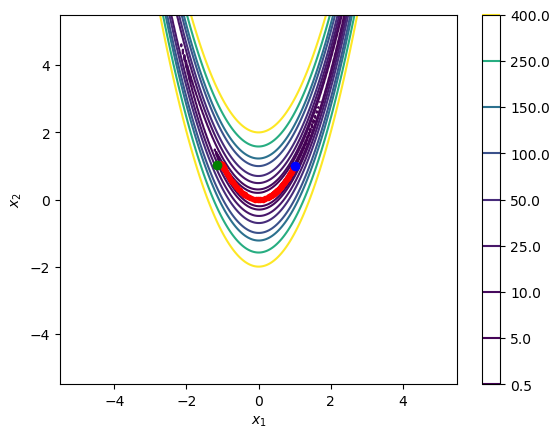


Resultado para x0 = [-1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1. ]:
xk = [1.         1.         1.         1.         1.         1.
 1.         0.99999999 0.99999999 0.99999998], k = 31779, f(xk) = 2.065132517332186e-16, |Grad f(xk)| = 2.1052009867395674e-08
Convergió: True

Resultado para x0 = [-1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.
 -1.2  1.  -1.2  1.  -1.2  1. ]:
xk = [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.99999999
 0.99999999 0.99999998], k = 34699, f(xk) = 1.9509293327050278e-16, |Grad f(xk)| = 2.105800378261179e-08
Convergió: True

Función de Hartmann dimensión 6:
Resultado para x0 = [0. 0. 0. 0. 0. 0.]:
xk = [0.20168963 0.15001062 0.47687359 0.27533246 0.31165157 0.65730054], k = 40, f(xk) = -3.0424577378422244, |Grad f(xk)| = 4.255030545959989e-06
Convergió: True



In [58]:
# Puntos iniciales para la función de Himmelblau
puntos_iniciales_himmelblau = [np.array([2.0, 4.0])]

# Puntos iniciales para la función de Beale
puntos_iniciales_beale = [np.array([2.0, 3.0])]

# Puntos iniciales para la función de Rosenbrock
puntos_iniciales_rosenbrock = [
    np.array([-1.2, 1.0]),
    np.array([-1.2 if i % 2 == 0 else 1.0 for i in range(10)]), # Usamos una list comprenhension
    np.array([-1.2 if i % 2 == 0 else 1.0 for i in range(20)])
]

# Puntos iniciales para la función de Hartmann
puntos_iniciales_hartmann = [np.zeros(6)]

# Epsilon de la máquina
epsilon_m = np.finfo(float).eps

n = 2  # Dimensión del problema

# Configuración de tolerancia
tau = np.sqrt(n * epsilon_m)
tau_hartman = np.sqrt(n)* epsilon_m**(1/3)

# Número máximo de iteraciones
NMax = 50000

# Parametros de la funcion
deltaMin = 1*10**(-5)
eta = 0.25
deltaMax = 0.25

# Función para probar el algoritmo de newton con diferentes funciones
def probar_newton(func, grad_func, hess_func, puntos_iniciales, name):
    for x0 in puntos_iniciales:
        if not name:
            xk, k, convergio, gradiente, secuencia = ConfidenceRegion_Cauchy(func, grad_func, hess_func, x0, tau, NMax, deltaMax, deltaMin, eta)
        else:
            xk, k, convergio, gradiente, secuencia = ConfidenceRegion_Cauchy(func, grad_func, hess_func, x0, tau_hartman, NMax, deltaMax, deltaMin, eta)
        valor_final = func(xk)
        print(f"Resultado para x0 = {x0}:")
        print(f"xk = {xk}, k = {k}, f(xk) = {valor_final}, |Grad f(xk)| = {np.linalg.norm(gradiente)}")
        print(f"Convergió: {convergio}")
        if len(x0) == 2 and secuencia:
            print(f"Secuencia de puntos: {secuencia[:10]}")
            contornosFnc2D(func, xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5, levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400], secuencia=secuencia)
        print()

# Probar con la función de Himmelblau
print("Función de Himmelblau:")
probar_newton(himmelblau, grad_himmelblau, hessian_himmelblau, puntos_iniciales_himmelblau, False)

# Probar con la función de Beale
print("Función de Beale:")
probar_newton(beale, grad_beale, hessian_beale, puntos_iniciales_beale, False)

# Probar con la función de Rosenbrock
print("Función de Rosenbrock:")
probar_newton(rosenbrock, grad_rosenbrock, hessian_rosenbrock, puntos_iniciales_rosenbrock, False)

# Probar con la función de Hartmann
print("Función de Hartmann dimensión 6:")
probar_newton(hartmann_6D, grad_hartmann_6D, hessian_hartmann_6D, puntos_iniciales_hartmann, True)

El algoritmo funciona bastante bien para las funciones mas complejas y de altas dimensiones. Funciona mucho mejor que con los metodos de busqueda en linea, y es que al final los métodos de región de confianza son más adecuados para problemas más complejos y de mayor dimensión. Con ambas regiones el algoritmo convergio. Para el delta mas pequeno se tardo un poco mas, pero al final pudo converger.  